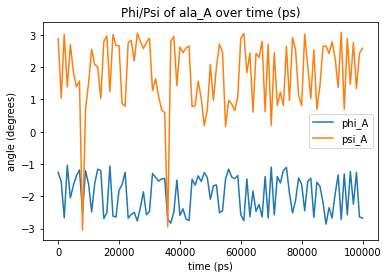

In [8]:
# load modules
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

# use numpy to read in COLVAR files
# load COLVAR_A from /home/ac7407/comp-class/comp-lab-class/Week6/masterclass-21-4/masterclass-21-4/data/diala/ala_A directory 
# load COLVAR_B from /home/ac7407/comp-class/comp-lab-class/Week6/masterclass-21-4/masterclass-21-4/data/diala/ala_B directory 
data_A = np.loadtxt('/home/ac7407/comp-class/comp-lab-class/Week6/masterclass-21-4/masterclass-21-4/data/diala/ala_A/COLVAR_A')
data_B = np.loadtxt('/home/ac7407/comp-class/comp-lab-class/Week6/masterclass-21-4/masterclass-21-4/data/diala/ala_B/COLVAR_B')

# use matplotlib to plot phi and psi angles
# plot phi and psi angles for data_A every 1000 steps vs time (ps)
# plot phi and psi angles for data_B every 1000 steps vs time (ps)
plt.plot(data_A[::1000,0], data_A[::1000,1], label='phi_A')
plt.plot(data_A[::1000,0], data_A[::1000,2], label='psi_A')
plt.xlabel('time (ps)')
plt.ylabel('angle (degrees)')
plt.title('Phi/Psi of ala_A over time (ps)')
plt.legend()
plt.show()

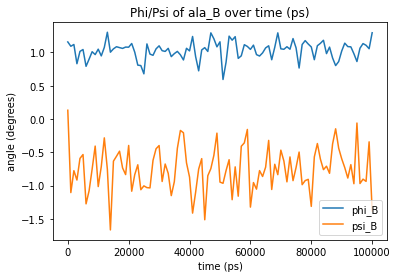

In [9]:
plt.plot(data_B[::1000,0], data_B[::1000,1], label='phi_B')
plt.plot(data_B[::1000,0], data_B[::1000,2], label='psi_B')
plt.xlabel('time (ps)')
plt.ylabel('angle (degrees)')
plt.title('Phi/Psi of ala_B over time (ps)')
plt.legend()
plt.show()

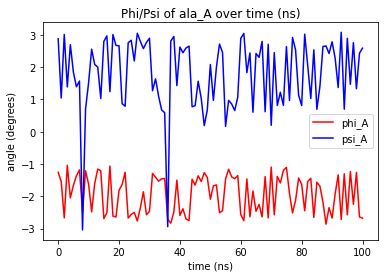

In [14]:
# use mdtraj to read in traj_comp.xtc files
# load traj_comp.xtc from /home/ac7407/comp-class/comp-lab-class/Week6/masterclass-21-4/masterclass-21-4/data/diala/ala_A/ directory
# load traj_comp.xtc from /home/ac7407/comp-class/comp-lab-class/Week6/masterclass-21-4/masterclass-21-4/data/diala/ala_B/ directory
traj_A = md.load('/home/ac7407/comp-class/comp-lab-class/Week6/masterclass-21-4/masterclass-21-4/data/diala/ala_A/traj_comp2.xtc', top='/home/ac7407/comp-class/comp-lab-class/Week6/masterclass-21-4/masterclass-21-4/data/diala/ala_A/confout.gro')
traj_B = md.load('/home/ac7407/comp-class/comp-lab-class/Week6/masterclass-21-4/masterclass-21-4/data/diala/ala_B/traj_comp.xtc', top='/home/ac7407/comp-class/comp-lab-class/Week6/masterclass-21-4/masterclass-21-4/data/diala/ala_B/confout.gro')

# use mdtraj to calculate phi and psi angles for traj_A and traj_B
phi_A = md.compute_phi(traj_A)
psi_A = md.compute_psi(traj_A)
phi_B = md.compute_phi(traj_B)
psi_B = md.compute_psi(traj_B)

# read in second array from phi_A and psi_A and phi_B and psi_B
# plot phi and psi angles for traj_A every 1000 steps vs time (ps)
# plot phi and psi angles for traj_B every 1000 steps vs time (ps)
plt.plot(phi_A[1][::1000], label='phi_A', color='red')
plt.plot(psi_A[1][::1000], label='psi_A', color='blue')
plt.xlabel('time (ns)')
plt.ylabel('angle (degrees)')
plt.title('Phi/Psi of ala_A over time (ns)')
plt.legend()
plt.show()


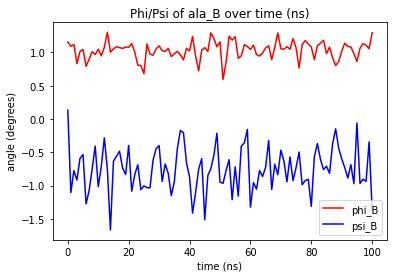

In [15]:
plt.plot(phi_B[1][::1000], label='phi_B', color='red')
plt.plot(psi_B[1][::1000], label='psi_B', color='blue')
plt.xlabel('time (ns)')
plt.ylabel('angle (degrees)')
plt.title('Phi/Psi of ala_B over time (ns)')
plt.legend()
plt.show()


In [16]:
# compute standard deviation of phi and psi angles for traj_A and traj_B
print('Standard deviation of phi_A is', np.std(phi_A[1]))
print('Standard deviation of psi_A is', np.std(psi_A[1]))
print('Standard deviation of phi_B is', np.std(phi_B[1]))
print('Standard deviation of psi_B is', np.std(psi_B[1]))

Standard deviation of phi_A is 0.5538316
Standard deviation of psi_A is 1.024898
Standard deviation of phi_B is 0.13238177
Standard deviation of psi_B is 0.34453443


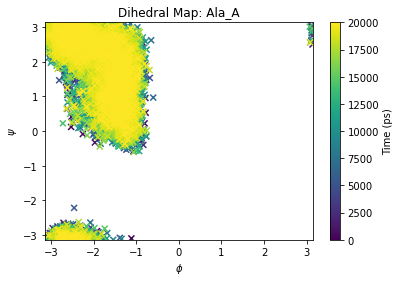

In [15]:
# ramachandran plot using traj_A
psi_indices, phi_indices = [4, 6, 8, 14], [6, 8, 14, 16]
angles = md.compute_dihedrals(traj_A, [phi_indices, psi_indices])

from pylab import *
from math import pi

figure()
title('Dihedral Map: Ala_A')
scatter(angles[:, 1], angles[:, 0], marker='x', c=traj_A.time)
cbar = colorbar()
cbar.set_label('Time (ps)')
xlabel(r'$\phi$')
ylabel(r'$\psi$')
xlim(-pi, pi)
ylim(-pi, pi)
show()




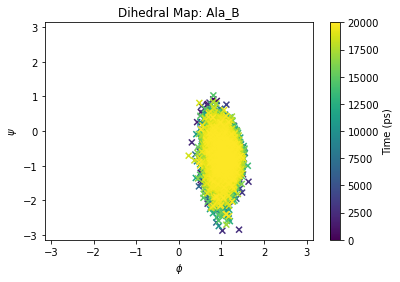

In [16]:
# ramachandran plot using traj_B
psi_indices, phi_indices = [4, 6, 8, 14], [6, 8, 14, 16]
angles = md.compute_dihedrals(traj_B, [phi_indices, psi_indices])

figure()
title('Dihedral Map: Ala_B')
scatter(angles[:, 1], angles[:, 0], marker='x', c=traj_B.time)
cbar = colorbar()
cbar.set_label('Time (ps)')
xlabel(r'$\phi$')
ylabel(r'$\psi$')
xlim(-pi, pi)
ylim(-pi, pi)
show()